# Data Cleaning Notebook

This notebook demonstrates the process of data cleaning, which is an essential step in the data preprocessing pipeline. By cleaning the dataset, we ensure the data is ready for further analysis or modeling. The key objectives are:
- Handle missing values.
- Remove unnecessary or redundant rows/columns.
- Address inconsistencies in the data.

We will use a small sample dataset to illustrate common cleaning techniques.


In [10]:
#Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Loading the Dataset

We will load a sample dataset containing issues like missing values, redundant columns, and inconsistencies. This dataset represents a fictional employee database.


In [11]:
# Sample dataset
data = {
    "ID": [1, 2, 3, 4, 5, 6, 7, 8],
    "Name": ["Alice", "Bob", np.nan, "Eve", "Charlie", "Frank", "Grace", "Hannah"],
    "Age": [25, 35, 28, np.nan, 45, np.nan, 30, 27],
    "Salary": [50000, np.nan, 60000, 58000, 70000, np.nan, 62000, 64000],
    "Join_Date": ["2023-01-10", "2023-03-15", np.nan, "2023-05-20", "2023-02-01", "2023-04-10", "2023-06-25", "2023-07-01"],
    "Department": ["HR", "IT", "Finance", "HR", np.nan, "IT", "Marketing", "Marketing"]
}

df = pd.DataFrame(data)

# Display dataset
df

,ID,Name,Age,Salary,Join_Date,Department
0,1,Alice,25.0,50000.0,2023-01-10,HR
1,2,Bob,35.0,NaN,2023-03-15,IT
2,3,NaN,28.0,60000.0,NaN,Finance
3,4,Eve,NaN,58000.0,2023-05-20,HR
4,5,Charlie,45.0,70000.0,2023-02-01,NaN
5,6,Frank,NaN,NaN,2023-04-10,IT
6,7,Grace,30.0,62000.0,2023-06-25,Marketing
7,8,Hannah,27.0,64000.0,2023-07-01,Marketing


## Understanding the Dataset

### Problems in the Data:
1. **Missing Values**:
   - `Name` column has one missing value.
   - `Age` and `Salary` columns contain multiple missing values.
   - `Join_Date` has a missing entry.
   - `Department` has one missing entry.

2. **Redundant Columns**:
   - The `ID` column is not informative for analysis.

3. **Inconsistencies**:
   - Missing values in key columns affect data integrity.

Our goal is to address these issues step-by-step.


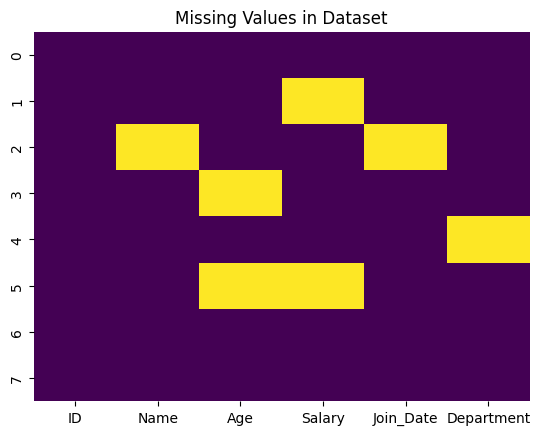

In [12]:
# Visualize missing data
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values in Dataset")
plt.show()

### Handling Missing Values

We will address missing values using the following techniques:
- Impute numerical columns (`Age`, `Salary`) using mean/median values.
- Impute categorical columns (`Name`, `Department`) using mode or forward fill.
- Interpolate missing dates (`Join_Date`) using linear interpolation.


In [13]:
# Impute numerical columns
df['Age'].fillna(df['Age'].median(), inplace=True)  # Median imputation
df['Salary'].fillna(df['Salary'].mean(), inplace=True)  # Mean imputation

# Impute categorical columns
df['Name'].fillna("Unknown", inplace=True)  # Mode or placeholder
df['Department'].fillna(method='ffill', inplace=True)  # Forward fill

# Interpolate missing dates
df['Join_Date'] = pd.to_datetime(df['Join_Date'])  # Convert to datetime
df['Join_Date'] = df['Join_Date'].interpolate(method='linear')


C:\Users\W T\AppData\Local\Temp\ipykernel_1844\4175070960.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)  # Median imputation
C:\Users\W T\AppData\Local\Temp\ipykernel_1844\4175070960.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as

### Removing Redundant Columns

The `ID` column is removed as it does not contribute to meaningful analysis.


In [14]:
# Drop the 'ID' column
df.drop(columns=['ID'], inplace=True)

## Cleaned Dataset

Below is the cleaned dataset after handling missing values and removing redundant columns.


In [15]:
# Displaying the cleaned dataset
df

,Name,Age,Salary,Join_Date,Department
0,Alice,25.0,50000.000000,2023-01-10,HR
1,Bob,35.0,60666.666667,2023-03-15,IT
2,Unknown,28.0,60000.000000,2023-04-17,Finance
3,Eve,29.0,58000.000000,2023-05-20,HR
4,Charlie,45.0,70000.000000,2023-02-01,HR
5,Frank,29.0,60666.666667,2023-04-10,IT
6,Grace,30.0,62000.000000,2023-06-25,Marketing
7,Hannah,27.0,64000.000000,2023-07-01,Marketing


## Summary of Cleaning Steps

1. **Missing Values**:
   - Imputed `Age` using the median.
   - Imputed `Salary` using the mean.
   - Filled missing `Name` with a placeholder value.
   - Forward-filled `Department` values.
   - Interpolated missing `Join_Date`.

2. **Redundant Columns**:
   - Removed the `ID` column.

The cleaned dataset is now ready for further analysis.
